# `MinDriver` steps

In this tutorial, we show how we can save individual steps during minimisation as well as how we can analyse them. We are going to minimise a simple system object. For details on how to define a system object, please have a look at other tutorials.

In [1]:
import oommfc as mc
import discretisedfield as df
import micromagneticmodel as mm

region = df.Region(p1=(-50e-9, -50e-9, 0), p2=(50e-9, 50e-9, 10e-9))
mesh = df.Mesh(region=region, cell=(5e-9, 5e-9, 5e-9))

system = mm.System(name='mindriver_steps')

system.energy = mm.Zeeman(H=(0, 0, 1e5))
system.m = df.Field(mesh, dim=3, value=(1, 0, 0), norm=1.1e6)

We now have a system object and we can minimise it using `MinDriver`. By default, `MinDriver` saves only the data of the last step in the relexation. However, if we want to save all individual steps in between, we have to pass `output_step=True` to the `drive` method.

In [2]:
md = mc.MinDriver()
md.drive(system, output_step=True)

Running OOMMF (ExeOOMMFRunner) [2021/01/01 17:30]... (0.9 s)


If we have a look at the table, we can see that multiple steps are saved:

In [3]:
system.table.data

,max_mxHxm,E,delta_E,bracket_count,line_min_count,conjugate_cycle_count,cycle_count,cycle_sub_count,energy_calc_count,E_zeeman,iteration,stage_iteration,stage,mx,my,mz
0,1.000000e+05,0.000000e+00,0.000000e+00,0.0,0.0,1.0,1.0,0.0,1.0,0.000000e+00,0.0,0.0,0.0,1.000000e+00,0.0,0.000000
1,9.999996e+04,-1.206285e-20,-1.206285e-20,1.0,0.0,1.0,1.0,0.0,2.0,-1.206285e-20,1.0,1.0,0.0,9.999996e-01,0.0,0.000873
2,9.848078e+04,-2.400340e-18,-2.388277e-18,2.0,0.0,1.0,1.0,0.0,3.0,-2.400340e-18,2.0,2.0,0.0,9.848078e-01,0.0,0.173648
3,9.396926e+04,-4.727747e-18,-2.327407e-18,3.0,0.0,2.0,2.0,0.0,4.0,-4.727747e-18,3.0,3.0,0.0,9.396926e-01,0.0,0.342020
4,8.660254e+04,-6.911504e-18,-2.183757e-18,4.0,0.0,3.0,3.0,0.0,5.0,-6.911504e-18,4.0,4.0,0.0,8.660254e-01,0.0,0.500000
5,7.660444e+04,-8.885258e-18,-1.973754e-18,5.0,0.0,4.0,4.0,0.0,6.0,-8.885258e-18,5.0,5.0,0.0,7.660444e-01,0.0,0.642788
6,6.427876e+04,-1.058904e-17,-1.703780e-18,6.0,0.0,5.0,5.0,0.0,7.0,-1.058904e-17,6.0,6.0,0.0,6.427876e-01,0.0,0.766044
7,5.000000e+04,-1.197108e-17,-1.382038e-18,7.0,0.0,6.0,6.0,0.0,8.0,-1.197108e-17,7.0,7.0,0.0,5.000000e-01,0.0,0.866025
8,3.464669e+04,-1.296684e-17,-9.957653e-19,8.0,0.0,7.0,7.0,0.0,9.0,-1.296684e-17,8.0,8.0,0.0,3.464669e-01,0.0,0.938062
9,3.420201e+04,-1.298938e-17,-2.253721e-20,9.0,0.0,7.0,7.0,0.0,10.0,-1.298938e-17,9.0,9.0,0.0,3.420201e-01,0.0,0.939693


Using all the utility of the `Table` object, we can analyse the data. For instance, we can plot the energy.

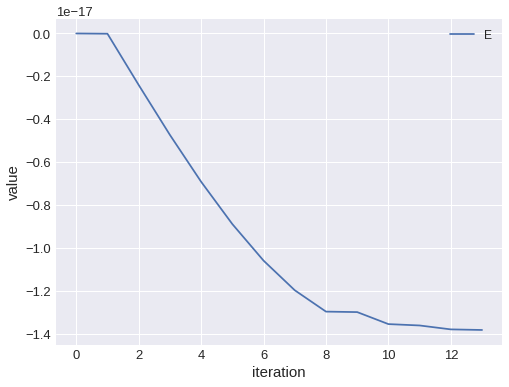

In [4]:
system.table.mpl(y=['E'])

By fecault, iteration is showed on the $x$-axis. We can change that by passing `x` variable. For example:

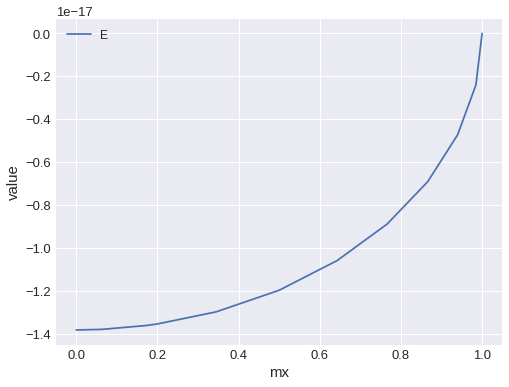

In [5]:
system.table.mpl(x='mx', y=['E'])

## `micromagneticdata` analysis

Similar to all other drivers, we can use `micromagneticdata` package to analyse the data. We start by creationg the data object:

In [6]:
import micromagneticdata as md
data = md.Data(name=system.name)

We can have a look at all drives we did so far:

In [7]:
data.info

,drive_number,date,time,driver
0,0,2021-01-01,17:21:57,MinDriver
1,1,2021-01-01,17:30:12,MinDriver


There is only one drive and we can get it by passing `0` (ot `-1`) as an index:

In [8]:
drive = data[0]

We can now plot the magnetisation at individual iterations, by indexing it again with the step number and do all usual operations allowed by `discretisedfield.Field` object.

In [9]:
drive[0]

Field(mesh=Mesh(region=Region(p1=(-5e-08, -5e-08, 0.0), p2=(5e-08, 5e-08, 1e-08)), n=(20, 20, 2), bc='', subregions={}), dim=3)

The number of steps in the drive is:

In [10]:
drive.n

14

Let us now create an interactive plot. For details on how to create custom interactive plots, please have a look at other tutorials.

In [11]:
@df.interact(step=drive.slider(continuous_update=False))
def my_plot(step):
    drive[step].plane('y').mpl()

interactive(children=(IntSlider(value=0, continuous_update=False, description='step', max=13), Output()), _dom…